<a href="https://colab.research.google.com/github/Dharitri-2022ds/ML-Capstone/blob/main/Almabetter_Module_6_capstone_ML_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After preprocessing and cleaning the data, I split it into training and test sets and used the training data to train our machine learning model. I experimented with several different** model architectures and hyperparameter **settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including mean absolute error, root mean squared error, and R-squared. I found that our model was able to make highly accurate predictions, with an R-squared value of 0.88 and a mean absolute error of just 2.58.

In addition to evaluating the performance of our model on the test data, I also conducted a series of** ablation studies** to understand the impact of individual features on the model's performance. I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

 My goal is to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss


# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Mount the drive and Dataset Loading

In [2]:
# Load Dataset
#Mount google drive for accessing the dataset of Bike Sharing Demand Prediction
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#File path of Seoul bike dataset in google drive
drive.mount("/content/drive", force_remount=True)

file_path = "/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv"
bike_df = pd.read_csv(file_path,encoding='latin-1')

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
bike_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

### Dataset Information

In [6]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

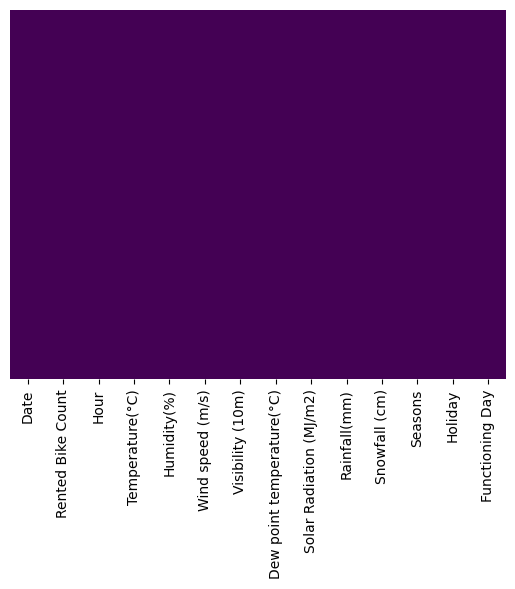

In [9]:
# Visualizing the missing values
sns.heatmap(bike_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### What did you know about your dataset?

There are 8760 observation and 14 features.

In a day we have 24 hours and 365 days a year, so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.

There are no missing /null values.

Dataset has all unique values i.e, there is no duplicate, which means data is free from bias.

Data has some object data types, it should be datetime data type.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description/Features description

**Date :** The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count** :  Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C)**: Temperature in Celsius, type : Float

**Humidity(%)**: Humidity in the air in %, type : int

**Wind speed (m/s)** : Speed of the wind in m/s, type : Float

**Visibility (10m)**: Visibility in m, type : int

**Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2**): Sun contribution, type : Float

**Rainfall(mm)**: Amount of raining in mm, type : Float

**Snowfall (cm)**: Amount of snowing in cm, type : Float

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *.

**Holiday**: If the day is holiday period or not, type: str

**Functioning Day**: If the day is a Functioning Day or not, type : str

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### **Pre processing the dataset:**

**Why do we need to handle missing values?**

- The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values, that's why we need to check missing values first.



In [13]:
# Missing values/ Null values count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

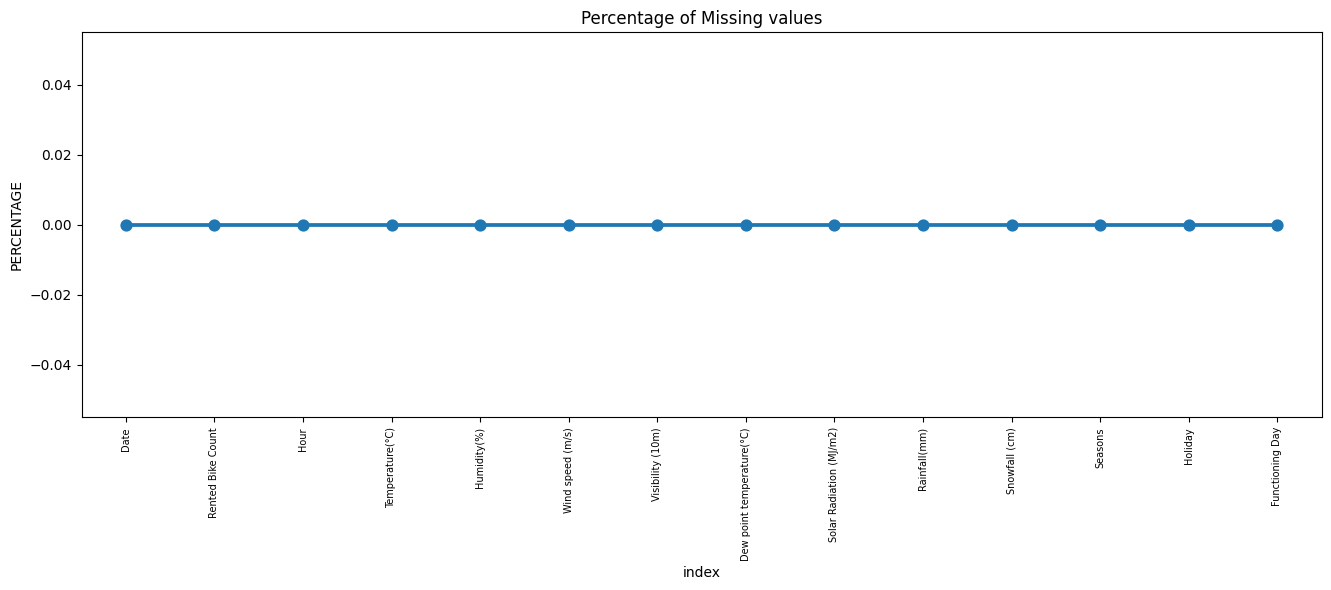

In [14]:
#visualing missing values
missing= pd.DataFrame((bike_df.isnull().sum()/len(bike_df))*100)
missing = missing.reset_index() # Reset the index to make 'index' a column
plt.figure(figsize=(16,5))
sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.ylabel("PERCENTAGE")
plt.title("Percentage of Missing values")
plt.show()



We can see clearly here there are no missing values.

In [15]:
# Checking for duplicate values
duplicate_count = bike_df.duplicated().sum()
print("There are {} duplicate values in the dataset".format(duplicate_count))

There are 0 duplicate values in the dataset


In the above dataset , there are no missing values and no duplicate values as well.

## Changing column name:
Some of the columns names in the dataset are too large and clumsy, so we decided to rename it.


In [16]:
# Rename the columns for better understanding
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})


- Python read "Date" column as a object type, basically it reads as a string. As this column is very important to analyze the users behaviour, we need to convert it into "datetime" format , then we split it into three columns i.e,'year', 'month','day' as a category data type.

### Breaking date column

In [17]:
# changing the "Date"column into "year","month"and "day" column
bike_df['Date'] = bike_df['Date'].str.replace('- ', '/')
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

In [18]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [19]:
# creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

### What all manipulations have you done and insights you found?

**Answer Here.**
- We convert the "date" column into three different columns i.e,"year","month","day".
- The "year" column in our dataset is basically contain the 2 unique number contains the details of from 2017 December to 2018 November.So if i consider this is a one year, then we don't need the "year" column, so we drop it.
- The other columns "day", it contains the details about the each day of the month, for our relevance we don't need each day of each month data but we need data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column as well.

In [20]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [21]:
bike_df['weekdays_weekend'].value_counts()

weekdays_weekend
0    6264
1    2496
Name: count, dtype: int64

### Changing data type

- As "Hour","month","weekdays_weekend" column are shown as an integer data type but actually it is a category data type, so we need to change this data type.

In [22]:
# change the int64 column into category column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [23]:
# Let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [24]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Exploratory Data Analysis(EDA) of the dataset



Why do we perform EDA?
- An EDA is a thorough examination meant to uncover the underlying structure of a dataset and is important for a company because it shows the trends,patterns, and relationships that are not readily apparent.

## Univariate Analysis

Why do you do univariate analysis?
- The key objective is to simply describe the data to find patterns within the data.


## Analysis of Dependent Variable

What is a dependent variable in data analysis?
- A dependent variable is a variable whose value will change depending on the value of another variable.

## Analysis of Categorical variable?

- Our dependent variable is 'Rented_Bike_Count'. So we need to analyze this column with the other columns by using some visualisation plots.
First we analyze the category data type then we proceed with the numerical data type.

#### Chart - 1
Month

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

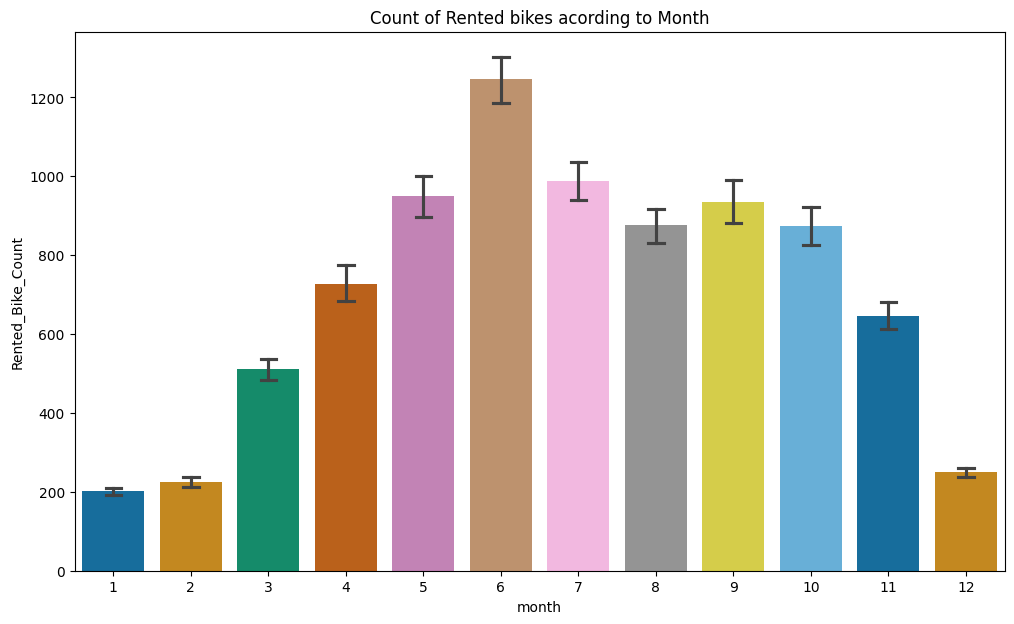

In [25]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
# Create fig and ax using plt.subplots()
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2,palette='colorblind')
ax.set(title='Count of Rented bikes acording to Month')

##### 1. Why did you pick the specific chart?

**Answer Here.**
- We have a categorical variable (month) and a numerical variable (Rented_Bike_Count). Bar plots are ideal for comparing the values of a numerical variable across different categories.
-This makes it easy for viewers to quickly grasp the differences in bike rentals across months.


##### 2. What is/are the insight(s) found from the chart?

From the above bar plot we can clearly say that, from the month 5 to 10(i.e.,May-October) the demand of the rented bike is high as compared to other months.

#### Chart - 2
 weekdays_weekend


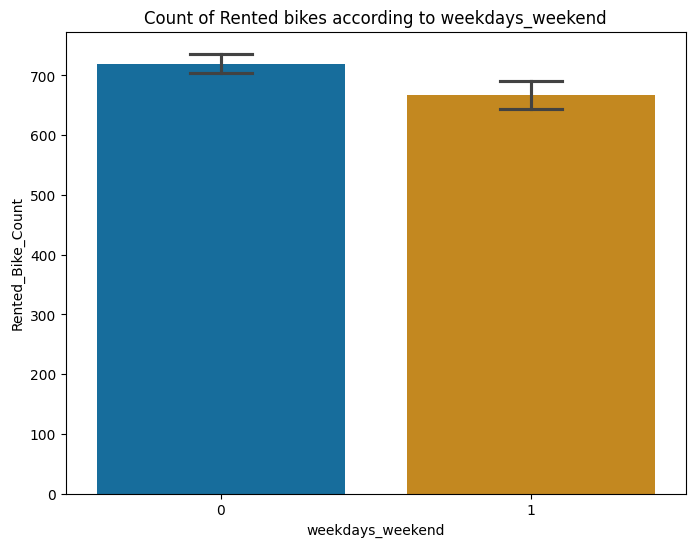

In [26]:
# Chart - 2 visualization code
fig, ax=plt.subplots(figsize=(8,6))
sns.barplot(x='weekdays_weekend',y='Rented_Bike_Count', data=bike_df,ax=ax,capsize=.2,palette='colorblind')
plt.title('Count of Rented bikes according to weekdays_weekend')
plt.show()

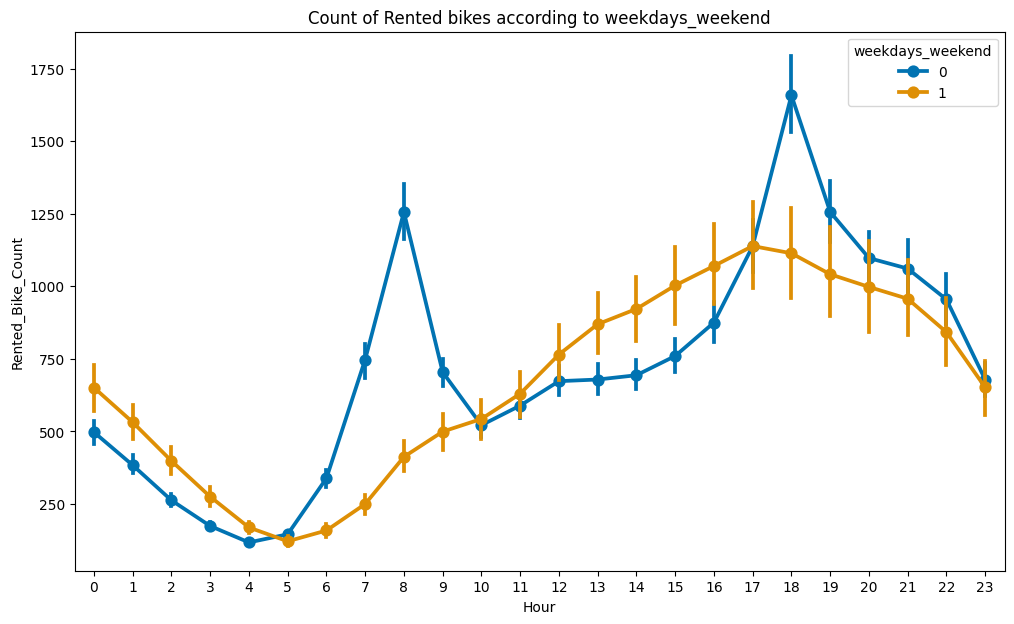

In [27]:
fig, ax=plt.subplots(figsize=(12,7))
sns.pointplot(x='Hour',y='Rented_Bike_Count', data=bike_df,hue='weekdays_weekend',ax=ax,palette='colorblind')
plt.title('Count of Rented bikes according to weekdays_weekend')
plt.show()

#####  What is/are the insight(s) found from the chart?

- From the above point plot and bar plot we can say that, in the weekdays the demand of the bike is higher than the weekends and it may be because of office.
- Peak time are in the morning 7 am to 9 am and in the evening 5 pm to 7 pm.
- In the weekends, it shows that the demand of rented bikes are very low specially in the morning hour but during the evening hour ,i.e., from 4 pm to 8 pm , the demand slightly increases.

#### Chart - 3
Hour

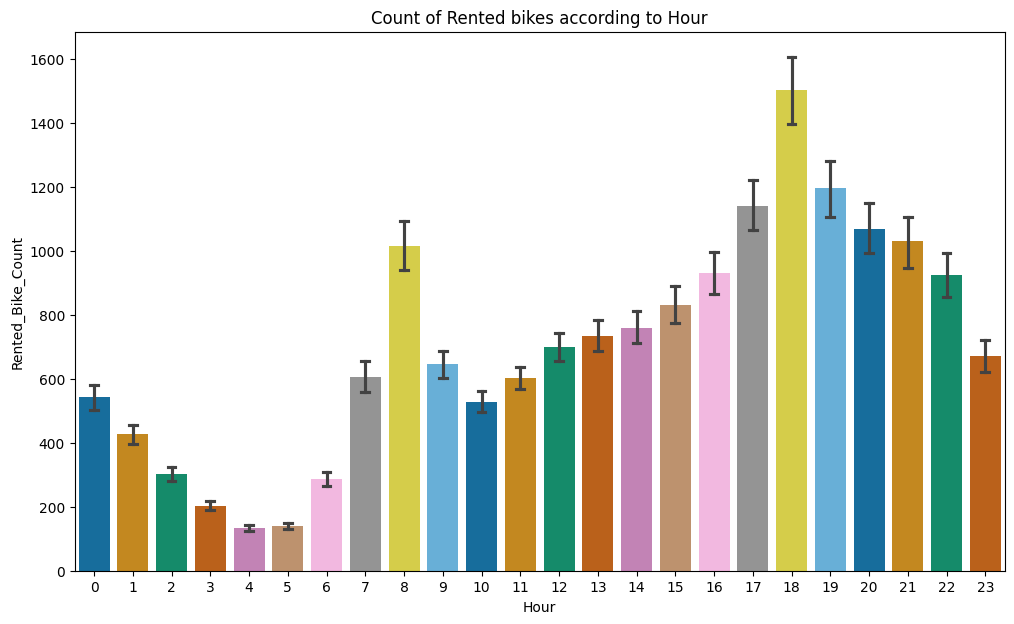

In [28]:
# Chart - 3 visualization code
fig, ax=plt.subplots(figsize=(12,7))
sns.barplot(x='Hour',y='Rented_Bike_Count', data=bike_df,ax=ax,capsize=.2,palette='colorblind')
plt.title('Count of Rented bikes according to Hour')
plt.show()

#####  What is/are the insight(s) found from the chart?

From the above , we conclude that generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.

#### Chart - 4
Functioning Day

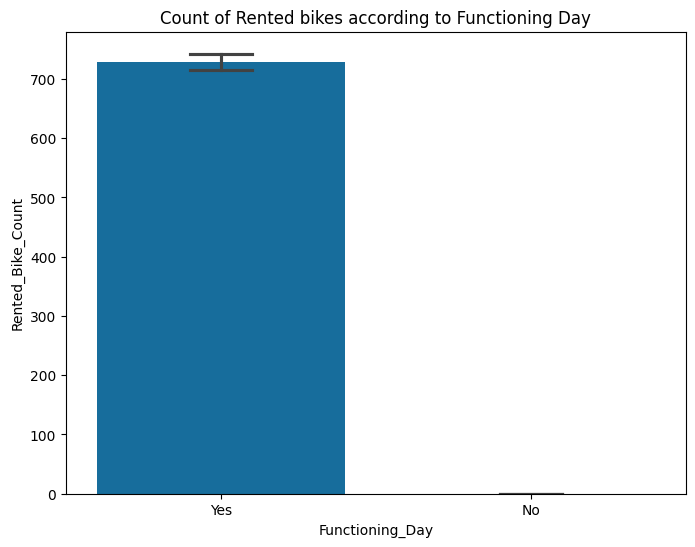

In [29]:
# Chart - 4 visualization code
fig, ax=plt.subplots(figsize=(8,6))
sns.barplot(x='Functioning_Day',y='Rented_Bike_Count', data=bike_df,ax=ax,capsize=.2,palette='colorblind')
plt.title('Count of Rented bikes according to Functioning Day')
plt.show()

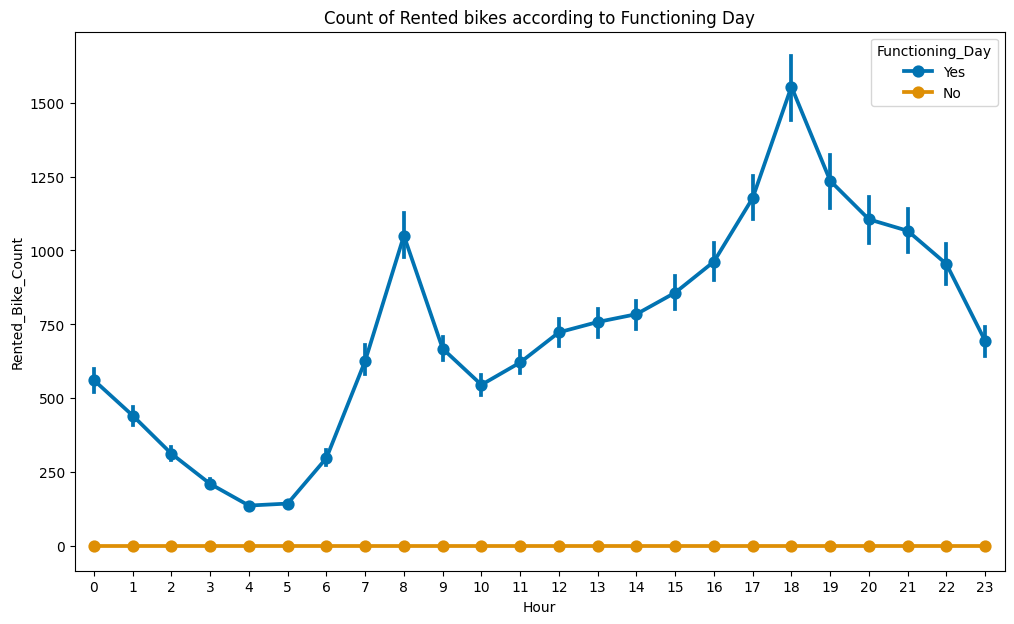

In [30]:
fig, ax=plt.subplots(figsize=(12,7))
sns.pointplot(x='Hour',y='Rented_Bike_Count', data=bike_df,hue='Functioning_Day', ax=ax,palette='colorblind')
plt.title('Count of Rented bikes according to Functioning Day')
plt.show()

The above bar and point plot shows that people don't use rented bikes in no functioning days.

#### Chart - 5
Seasons

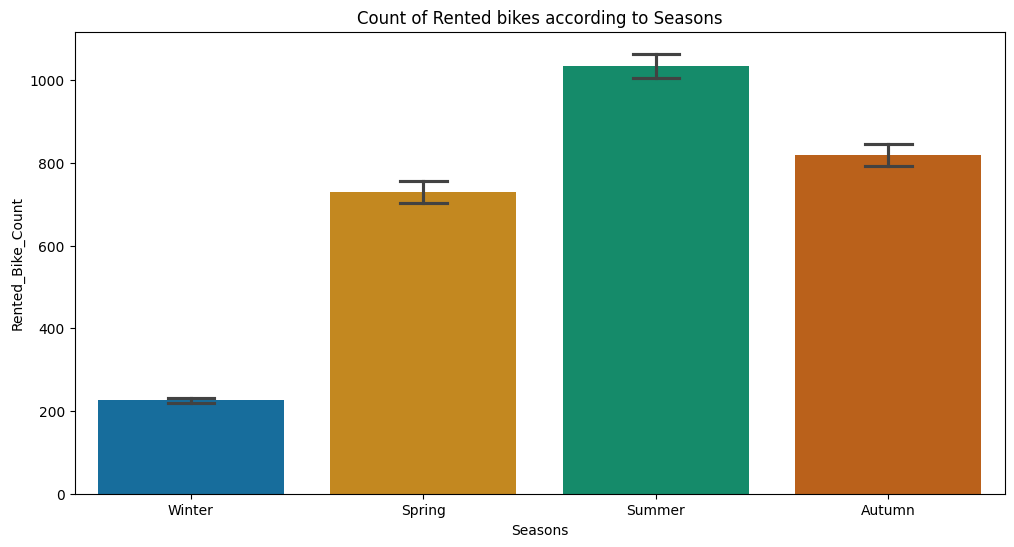

In [31]:
# Chart - 5 visualization code
fig, ax=plt.subplots(figsize=(12,6))
sns.barplot(x='Seasons',y='Rented_Bike_Count', data=bike_df,ax=ax,capsize=.2,palette='colorblind')
plt.title('Count of Rented bikes according to Seasons')
plt.show()

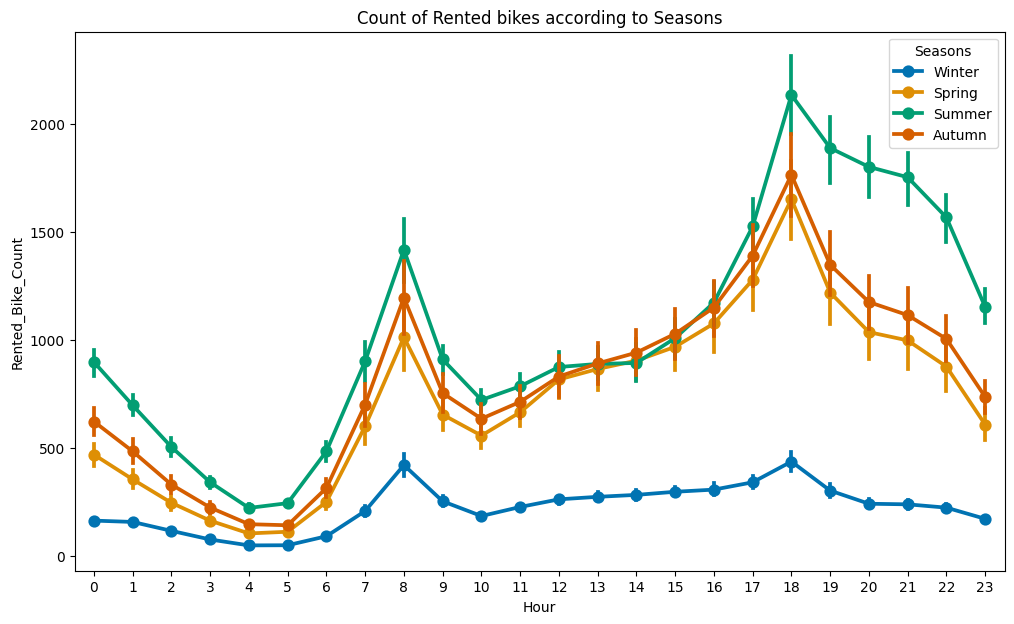

In [32]:
fig, ax=plt.subplots(figsize=(12,7))
sns.pointplot(x='Hour',y='Rented_Bike_Count', data=bike_df,hue='Seasons',ax=ax,palette='colorblind')
plt.title('Count of Rented bikes according to Seasons')
plt.show()

The above bar plot and point plot shows the use of rented bikes in four different seasons, and it clearly shows that:
- In summer season, the use of rented bike is high and peak time is from 7am to 9am and from 5 pm to 9pm.
- In winter season, the use of rented bike is very low may be because of snowfall,fog, cold,etc.


#### Chart - 6
Holiday

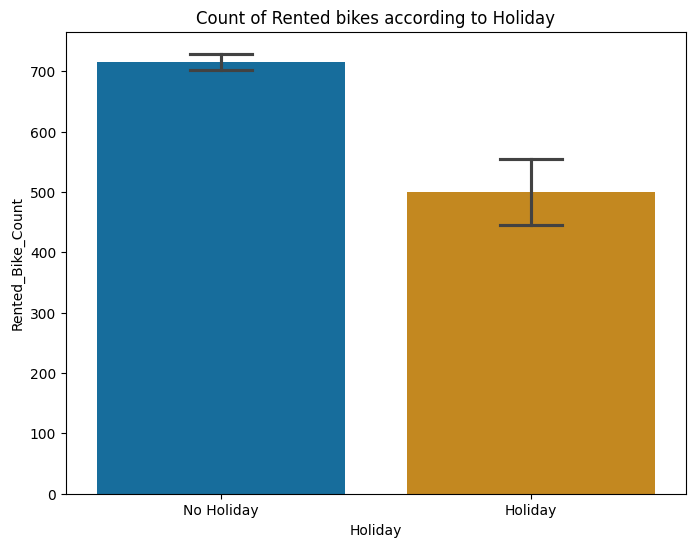

In [33]:
# Chart - 6 visualization code
fig, ax=plt.subplots(figsize=(8,6))
sns.barplot(x='Holiday',y='Rented_Bike_Count', data=bike_df,ax=ax,capsize=.2,palette='colorblind')
plt.title('Count of Rented bikes according to Holiday')
plt.show()

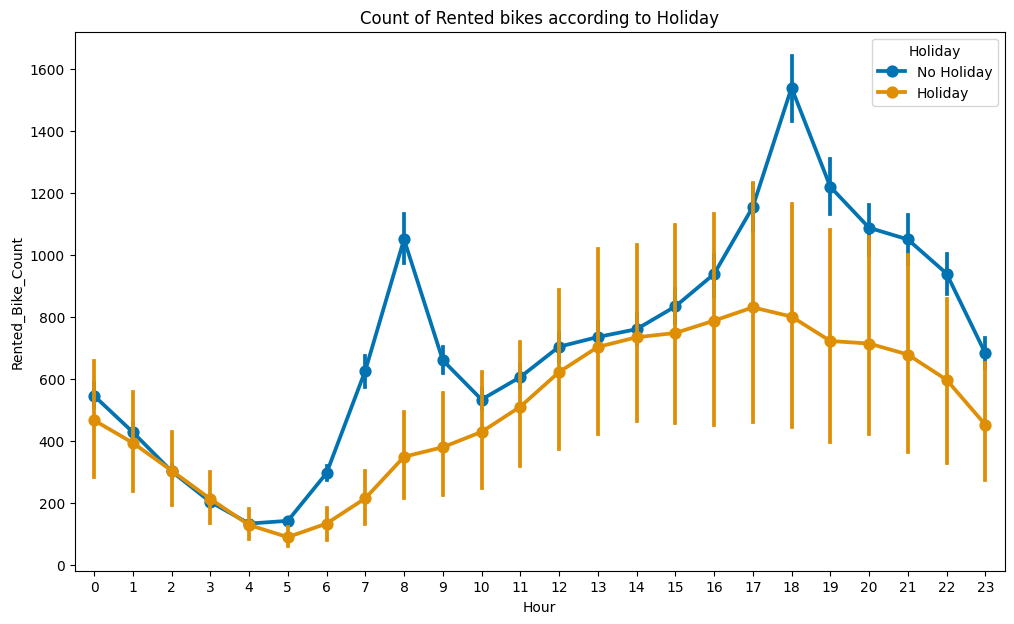

In [34]:
fig, ax=plt.subplots(figsize=(12,7))
sns.pointplot(x='Hour',y='Rented_Bike_Count', data=bike_df,hue='Holiday',ax=ax,palette='colorblind')
plt.title('Count of Rented bikes according to Holiday')
plt.show()

From the above bar plot and point plot, we conclude that during holiday, people uses the rented bike from 2pm to 8pm.

## Analysis of Numerical variables

What is Numerical Data?
- Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.

#### Pays little attention to the skewness of our numerical features

In [35]:
# separate numerical features from the dataframe
numerical_features = bike_df.select_dtypes(exclude=['object','category'])
numerical_features

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


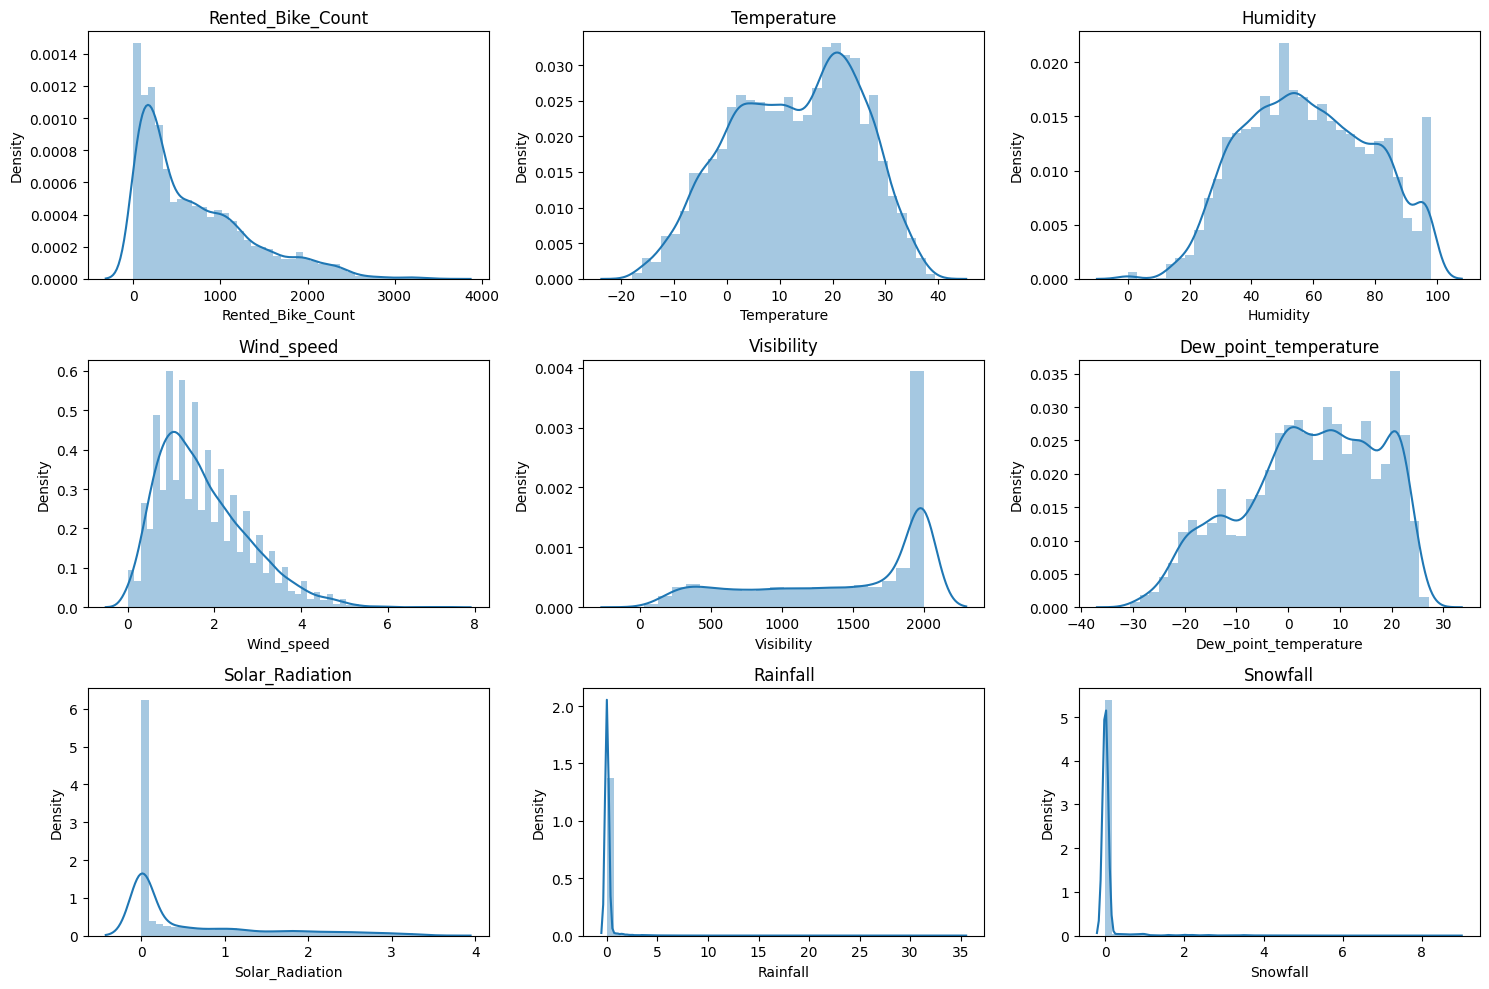

In [36]:
# printing displots to analyze the distribution of all numerical features
n=1
plt.figure(figsize=(15,10))
for i in numerical_features.columns: # Use the DataFrame 'numerical_features' instead of 'numeric_features
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

Right Skewed Columns are:
- Rented_Bike_Count(It is also dependent variable)
- Wind_speed
- Solar_Radiation
- Rainfall
- Snowfall

Left Skewed Columns are:
- Visibility
- Dew_point_temperature

## Relationship between numerical features and dependent variable

#### Numerical Vs Rented_Bike_Count

<Axes: xlabel='Temperature'>

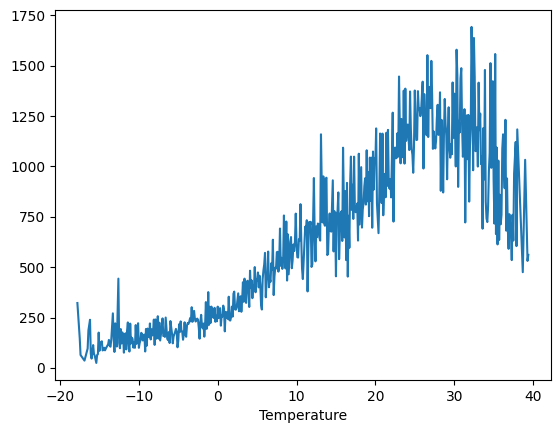

In [37]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
bike_df.groupby('Temperature')['Rented_Bike_Count'].mean().plot()

From the above plot we see that, people like to ride bikes when it is pretty hot around 25°C in average.

<Axes: xlabel='Dew_point_temperature'>

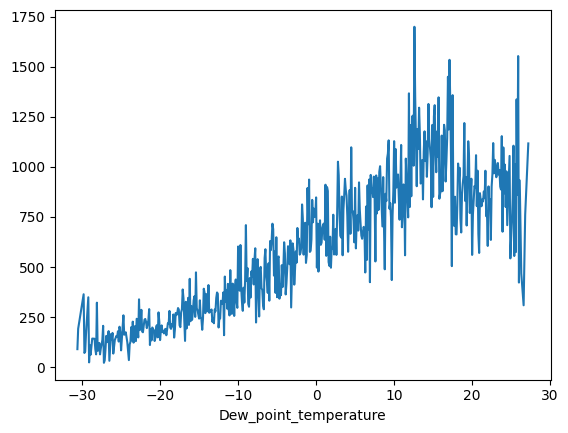

In [38]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
bike_df.groupby('Dew_point_temperature')['Rented_Bike_Count'].mean().plot()


from the above, we can say that the plot of "Dew_point_temperature" is almost same as the "Temperature". If there is some similarity present we can check it in the next step.

<Axes: xlabel='Solar_Radiation'>

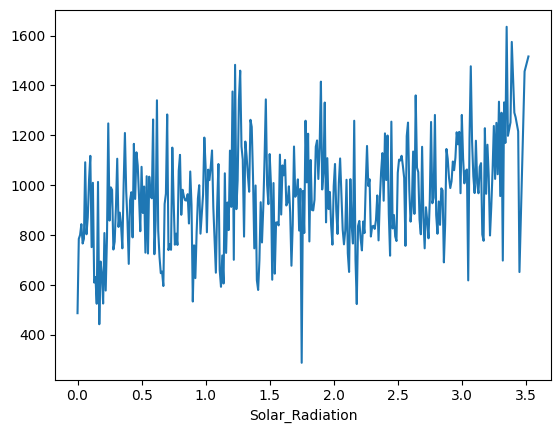

In [39]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
bike_df.groupby('Solar_Radiation')['Rented_Bike_Count'].mean().plot()

From the above plot we see that the amount of rented bikes is huge, when there is solar radiation and the count of rents is around 1000.

<Axes: xlabel='Snowfall'>

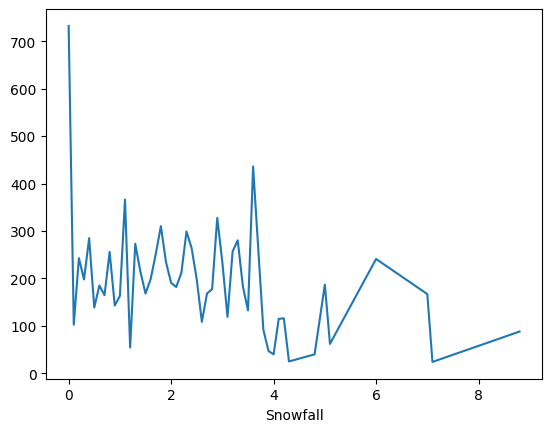

In [40]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
bike_df.groupby('Snowfall')['Rented_Bike_Count'].mean().plot()

From the above we can see that, on the y-axis, the amount of rented bike is very low. when we have more than 4cm of snow, the count for bike rent is much lower.

<Axes: xlabel='Rainfall'>

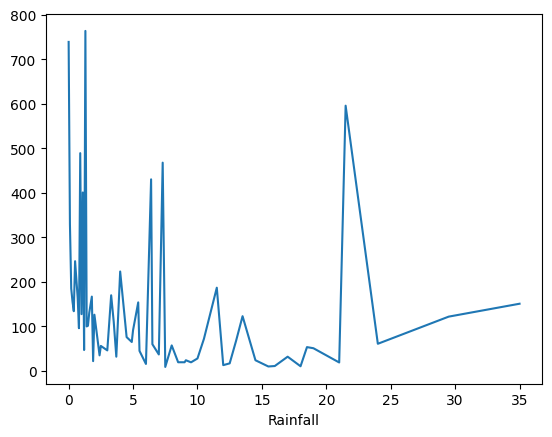

In [41]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
bike_df.groupby('Rainfall')['Rented_Bike_Count'].mean().plot()

We can see from the above plot that even if it rains heavily, the demand for rented bikes is not decreasing. For example, in the above graph we can see that even if we have 20mm of rain there is a big peak of rented bikes

<Axes: xlabel='Wind_speed'>

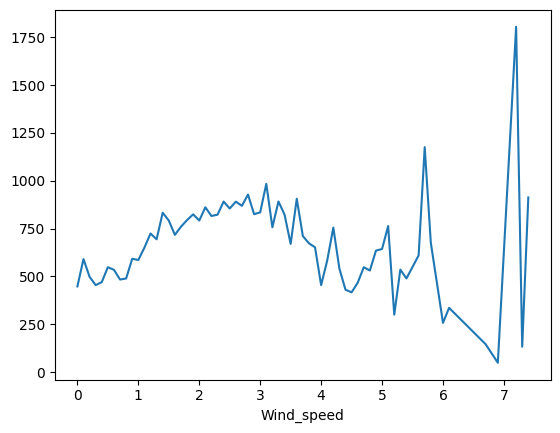

In [42]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
bike_df.groupby('Wind_speed')['Rented_Bike_Count'].mean().plot()

From the above we can see that , the demand of rented bike is uniformly distributed despite of wind speed. But when the speed of the wind is 7m/s, then the demand of bike increases that clearly means people love to ride bikes when it is little windy.

### Regression Plot

- The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis. Regression plot as the name suggests creates a regression line between 2 parameters and helps to visualise their linear relationships.

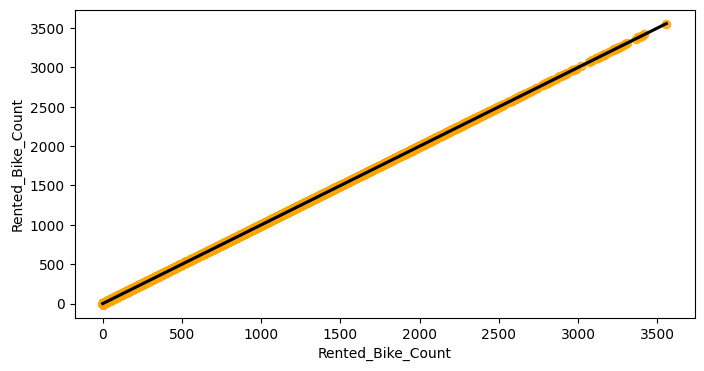

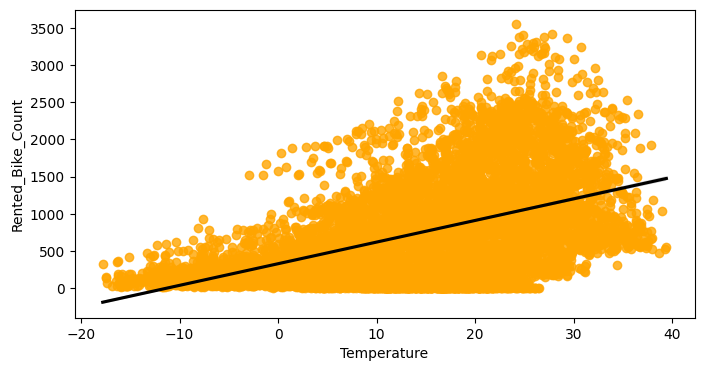

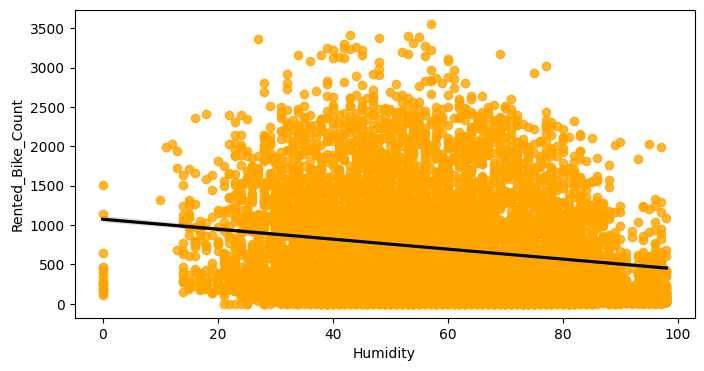

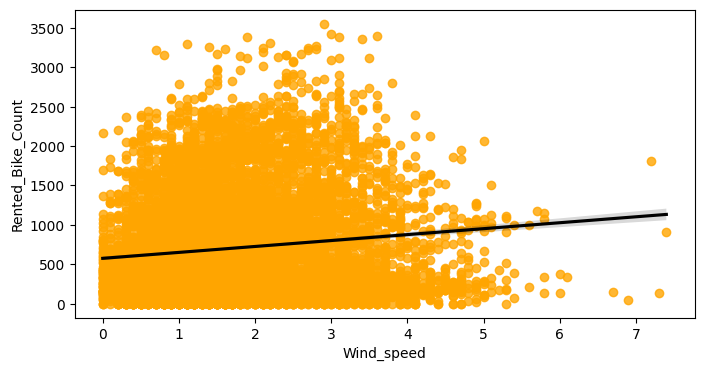

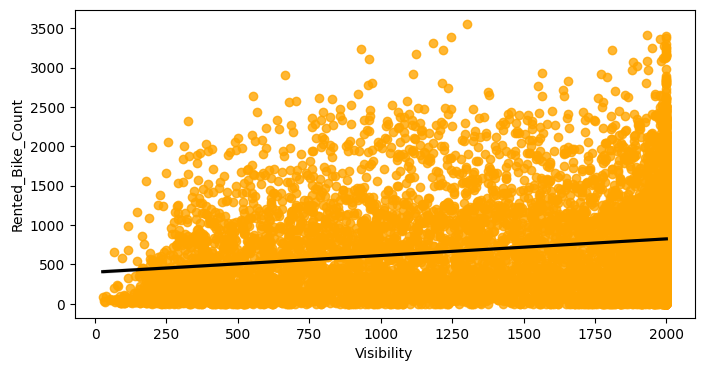

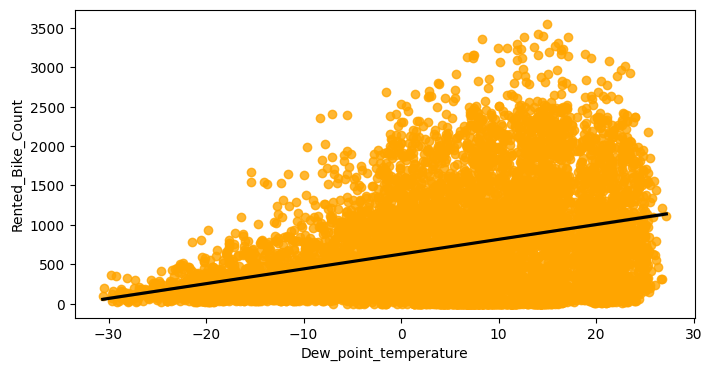

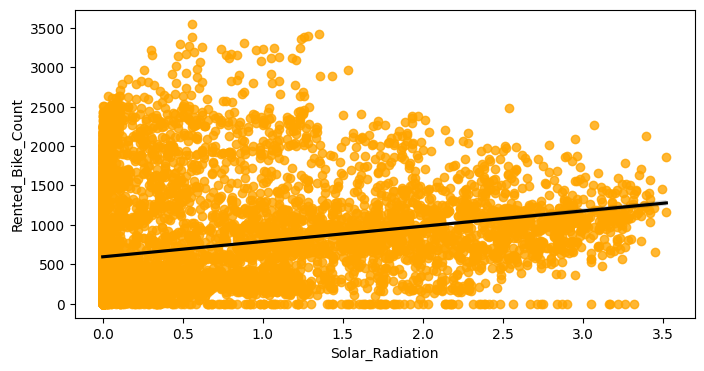

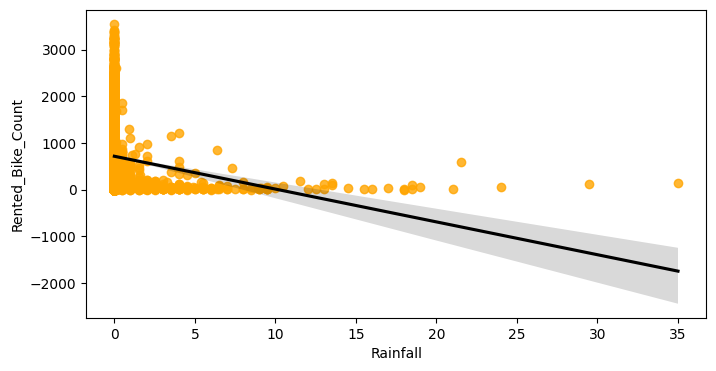

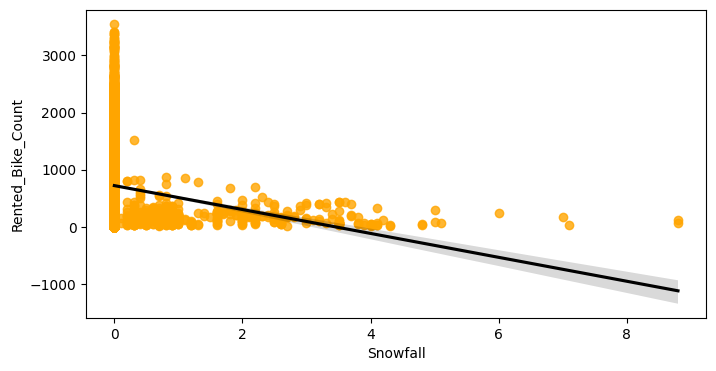

In [44]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})


From the above regression plot of all numerical features we see:
 - The columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable which means the rented bike count increases with increase of these features.

- 'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

## **Normalize Rented_Bike_Count column data**

- The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data into another format that allows processing data effectively.

The main purpose of data normalization is to minimize or even exclude duplicated data.

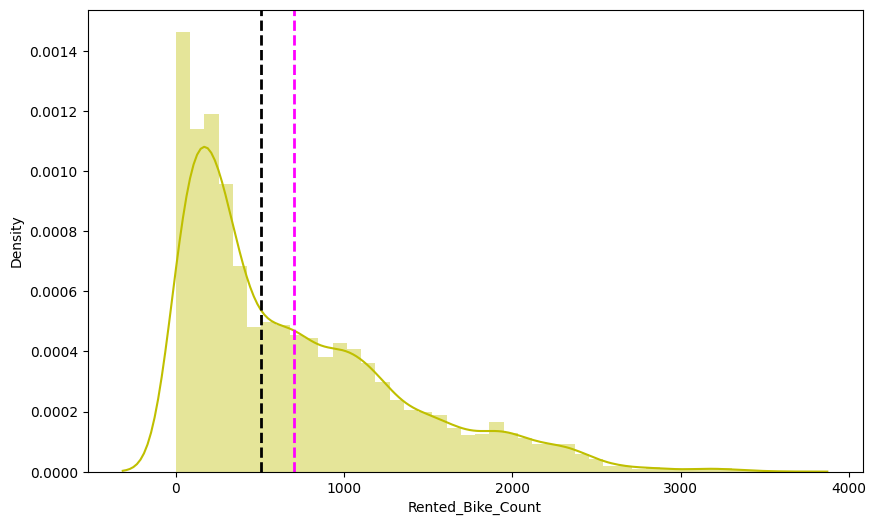

In [45]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

### Finding Outliers and treatment

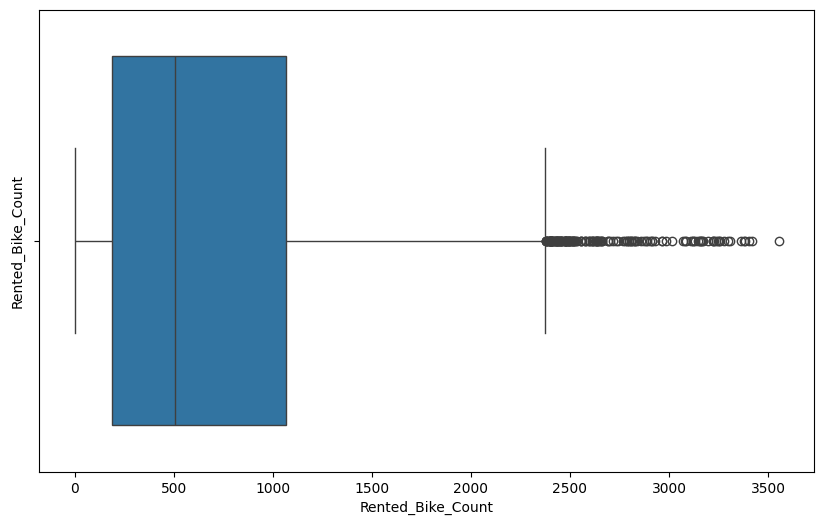

In [46]:
# Boxplot for Rented bike Count to check outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

In [47]:
# outliers treatments
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']= 4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>2,'Snowfall']= 2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']= 4

We have applied outlier treatment techniques to the dataset by replacing the outliers with the maximum values.

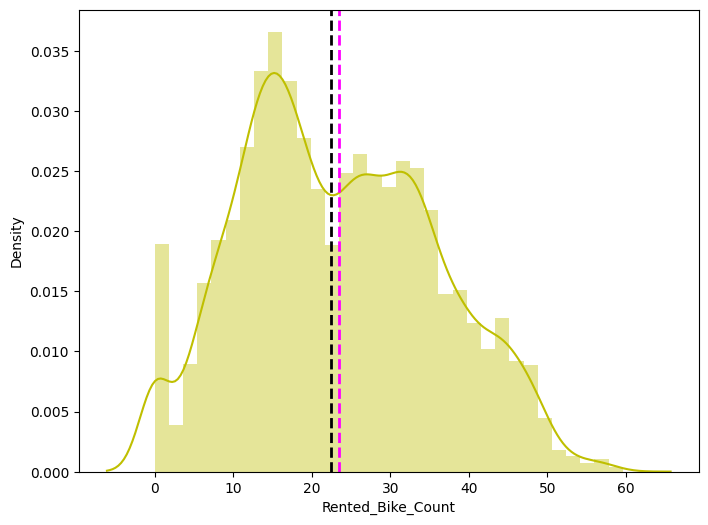

In [48]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

- Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution

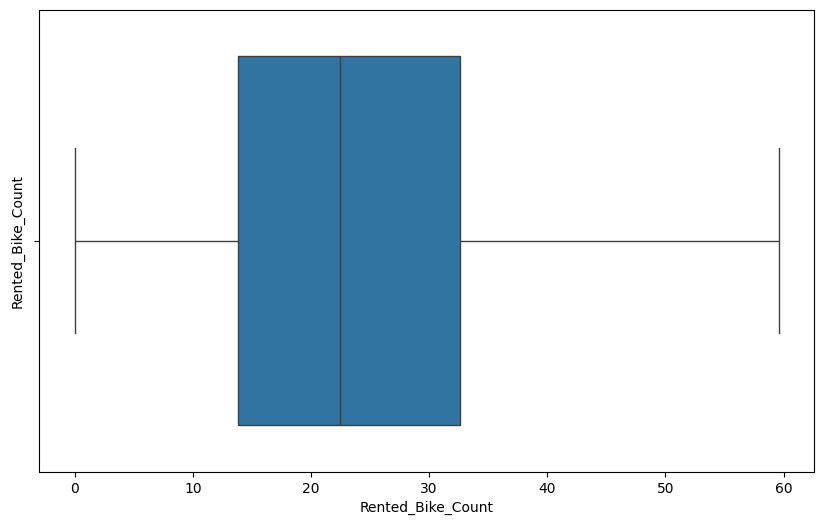

In [49]:
#After applying sqrt on Rented Bike Count checking whether we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

- After applying Square root to the Rented Bike Count column, we find that there are no outliers present.

In [50]:
# Convert categorical columns (e.g., 'Seasons') to numerical representations
bike_df_encoded = pd.get_dummies(bike_df, columns=['Seasons'])

# Select only numerical columns for correlation calculation
numerical_columns = bike_df_encoded.select_dtypes(include=['number'])

# Calculate correlations on the numerical columns
numerical_columns.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.131549,0.199280,0.379788,0.265658,-0.174224,-0.160917
Temperature,0.538558,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,-0.199780,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,0.131549,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,0.199280,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,0.379788,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,0.265658,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,-0.174224,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,-0.160917,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


## **Checking of Correlation between variables:**

- Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [51]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [52]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [53]:
## fit an OLS model

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     744.3
Date:                Sun, 30 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:56:20   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   699.4173    106.562      6.563      0.000     490.531     908.304
Temperature              40.3283      4.160      9.695      0.000      32.175      48.482
Humidity                 -8.5913      1.193     -7.203      0.000     -10.929      -6.253
Wind_speed               62.4552      5.951     10.495      0.000      50.790      74.121
Visibility               -0.0137      0.011     -1.254      0.210      -0.035       0.008
Dew_point_temperature    -5.0068      4.394     -1.139      0.255     -13.621       3.607
Solar_Radiation        -124.1270      9.254    -13.413      0.000    -142.267    -105.987
Rainfall               -162.0914     11.237    -14.425      0.000    -184.118    -140.065
Snowfall                 53.2592     19.061      2.794      0.005      15.895      90.623
==============================================================================
Omnibus:                      965.203   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.702
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       4.436   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is explained by the model.

- For F statistic , P value is less than 0.05 for 5% levelof significance.

- P value of dew point temp and visibility are very high and they are not significant.

- Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.

- The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems

- Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.

In [54]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,NaN,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,NaN,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,NaN,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,NaN,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,NaN,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,NaN,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,NaN,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


- From the OLS model we find that the 'Temperature' and 'Dew_point_temperature' are highly correlated so we need to drop one of them.
- For dropping them we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column.

For clarity, we use visualisation i.e heatmap in next step

#### Correlation Heatmap

- A correlation Heatmap is a type of graphical representation that displays the correlation matrix, which helps to determine the correlation between different variables.

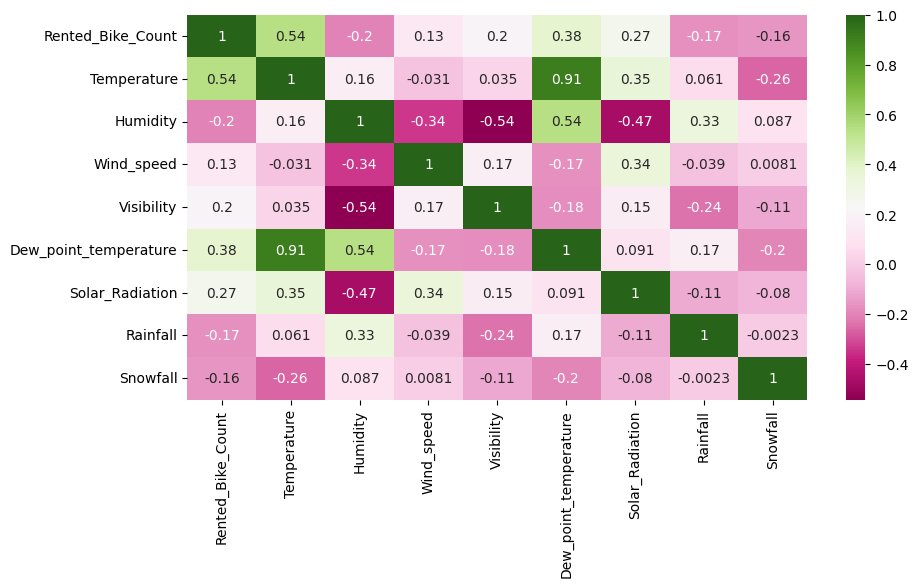

In [55]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,5))
# Select only numerical columns for correlation calculation
numerical_bike_df = bike_df.select_dtypes(include=['number'])
sns.heatmap(numerical_bike_df.corr(),cmap='PiYG',annot=True)
plt.show()

We can observe on the heatmap that on the target variable line, the most positively correlated variables to the rent are:

- the temperature
-the dew point temperature
- the solar radiation

And most negatively correlated variables are:

- humidity
- rainfall

- From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C)'

In [56]:

# drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [57]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.7+ KB


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

##** Create the dummy variables**

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

### 3. Categorical Encoding/One Hot Encoding

In [58]:
# Encode your categorical columns
#Assign all categorical features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?


**one hot encoding/categorical encoding**:

A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [59]:
#create a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,True,False
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,...,False,False,False,False,False,False,False,False,True,False
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,True,False
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,True,False


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1
**Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [60]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [61]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-6.0,39,1.0,2000,0.0,0.0,0.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,-6.2,40,0.9,2000,0.0,0.0,0.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,-6.0,36,2.3,2000,0.0,0.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [62]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [63]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [64]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Humidity             8760 non-null   int64  
 3   Wind_speed           8760 non-null   float64
 4   Visibility           8760 non-null   int64  
 5   Solar_Radiation      8760 non-null   float64
 6   Rainfall             8760 non-null   float64
 7   Snowfall             8760 non-null   float64
 8   Hour_1               8760 non-null   bool   
 9   Hour_2               8760 non-null   bool   
 10  Hour_3               8760 non-null   bool   
 11  Hour_4               8760 non-null   bool   
 12  Hour_5               8760 non-null   bool   
 13  Hour_6               8760 non-null   bool   
 14  Hour_7               8760 non-null   bool   
 15  Hour_8               8760 non-null   b

In [66]:
bike_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')

- The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

- MSE formula = (1/n) * Σ(actual – forecast)2 Where:

                     n = number of items,

                     Σ = summation notation,

                    Actual = original or observed y-value,

                    Forecast = y-value from regression.

- Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

- Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

- R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

- Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.​

## LINEAR REGRESSION

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.
        
         y_pred= β0 + β1x

  where β0 and β1 are intercept and slope respectively.

In case of multiple features the formula translates into:
        y_pred= β0 + β1x1 + β2x2 + β3x3 + .....

where x_1,x_2,x_3 are the features values and β0, β1, β2, β3,....
are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.


Gradient descent is the process by which the algorithm tries to update the parameters using a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

- No multicollinearity in the dataset.

- Independent variables should show linear relationship with dv.

- Residual mean should be 0 or close to 0.

- There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.

Let us now implement our first model. We will be using LinearRegression from scikit library.

In [67]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [68]:
#check the score
reg.score(X_train, y_train)

0.791252853377143

In [69]:
#check the coefficeint
reg.coef_

array([ 4.68899686e-01, -1.02733686e-01,  1.83389932e-02,  6.99377347e-04,
        9.18648101e-01, -5.11433440e+00, -2.17361057e-01, -2.18196972e+00,
       -5.03358899e+00, -7.07227656e+00, -9.68767884e+00, -9.28180883e+00,
       -4.17525131e+00,  1.98924368e+00,  7.41923561e+00,  1.62031037e+00,
       -3.02792590e+00, -3.03027527e+00, -1.90798462e+00, -2.28030752e+00,
       -2.40532863e+00, -1.09497887e+00,  7.19611360e-01,  4.50143285e+00,
        1.07240063e+01,  7.21392625e+00,  6.19079708e+00,  6.27641939e+00,
        5.13030344e+00,  1.46615648e+00, -9.03397290e+07,  4.78702031e+07,
       -7.87118106e+07,  3.41060308e+00,  2.83867043e+01, -6.19500042e-01,
        1.16279214e+07,  1.16279231e+07,  1.16279256e+07, -1.26582005e+08,
       -1.26582011e+08, -1.26582013e+08, -7.87118041e+07, -7.87118016e+07,
       -7.87118030e+07,  2.04432372e+00, -1.36518278e+00])

In [70]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [71]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.145114805768415
RMSE : 5.669666198795871
MAE : 4.30109837175655
R2 : 0.791252853377143
Adjusted R2 : 0.7866725004867255


Looks like our train set's r2 score value is 0.79 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [72]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [73]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 31.21751120108675
RMSE : 5.587263301571419
MAE : 4.260531657874549
R2 : 0.8023787935913236
Adjusted R2 : 0.7980425673069129


The test set's r2_score is 0.80. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [74]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])


**Heteroscedasticity**

Heteroscedasticity refers to a situation where the variance of the errors (residuals) is not constant across all levels of the independent variable(s) in a regression model.This violates one of the assumptions of linear regression, which is that the variance of the errors should be constant (homoscedastic) for all levels of the independent variable(s). If the plot shows a funnel shape, with the spread of residuals increasing or decreasing as the predicted values increase, this is an indication of heteroscedasticity.

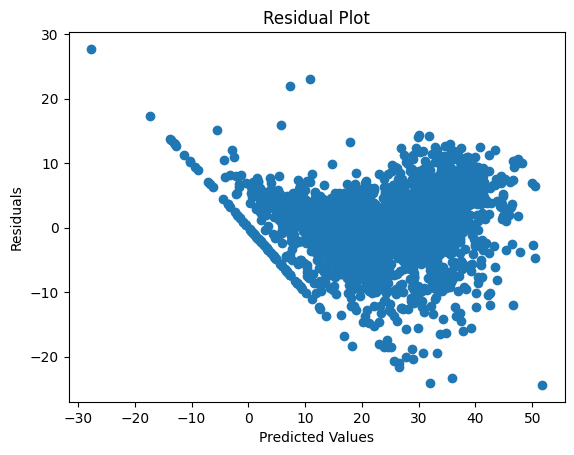

In [75]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

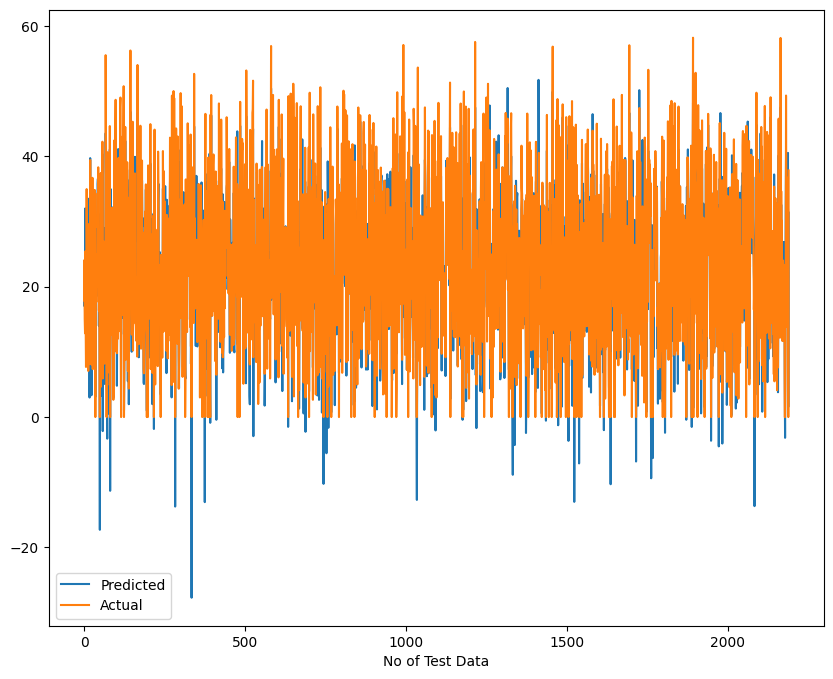

In [76]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**Ridge and Lasso Regression**

- Ridge and Lasso Regression are types of Regularization techniques.
- Regularization techniques are used to deal with overfitting and when the dataset is large.
- Ridge and Lasso Regression involve adding penalties to the regression function.

**Lasso Regression**

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [77]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [78]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.38086483341841226 0.3983632039954085


In [79]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 92.6464586070881
RMSE : 9.625303039753508
MAE : 7.304643598875601
R2 : 0.3983632039954085
Adjusted R2 : 0.38516202313069525


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***